## Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above. 

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [3]:
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
#Getting the fraction of the missing values for each variable

round(education.isnull().sum()*100/education.isnull().count(),2)


PRIMARY_KEY                      0.00
STATE                            0.00
YEAR                             0.00
ENROLL                          17.63
TOTAL_REVENUE                   14.21
FEDERAL_REVENUE                 14.21
STATE_REVENUE                   14.21
LOCAL_REVENUE                   14.21
TOTAL_EXPENDITURE               14.21
INSTRUCTION_EXPENDITURE         14.21
SUPPORT_SERVICES_EXPENDITURE    14.21
OTHER_EXPENDITURE               17.63
CAPITAL_OUTLAY_EXPENDITURE      14.21
GRADES_PK_G                     11.60
GRADES_KG_G                      8.85
GRADES_4_G                       8.78
GRADES_8_G                       8.78
GRADES_12_G                      8.78
GRADES_1_8_G                     8.78
GRADES_9_12_G                    8.78
GRADES_ALL_G                    11.60
AVG_MATH_4_SCORE                64.08
AVG_MATH_8_SCORE                64.34
AVG_READING_4_SCORE             64.28
AVG_READING_8_SCORE             66.62
dtype: float64

All null values are in yellow


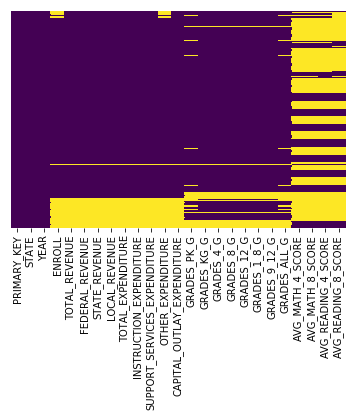

In [322]:
print('All null values are in yellow')
sns.heatmap(education.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?**

**ENROLL**

Base on dataset description, this variable should be comparable to GRADES_ALL. Reviewing the visualization above, GRADES_ALL is more complete than ENROLL, so I skip to clean this columns and I'll focus on cleaning GRADES_ALL coluimn.

**TOTAL_REVENUE**

Base on dataset description, this variable is the result of the sum of the next three columns: FEDERAL_REVENUE, STATE_REVENUE and LOCAL_REVENUE. If it's true we can skip to clean this column and cleaning the other 3 columns.

Let's make sure that saying above is true.

In [323]:
#Create a new column with sum of FEDERAL_REVENUE, STATE_REVENUE and LOCAL_REVENUE variables.
education['total_revenue'] = education['FEDERAL_REVENUE'] + education['STATE_REVENUE'] + education['LOCAL_REVENUE']

#Make a sustraction between columns, the result for all rows should be 0
education['diff_totalrevenue'] = education['total_revenue'] - pd.to_numeric(education['TOTAL_REVENUE'], downcast='integer')

#Verifying results
print('Number of unique values: {} '.format(education['diff_totalrevenue'].nunique()))

#As we got 2 different values and it's expected just 1 value, let's see what values are
print('Unique values:\n {} '.format(education['diff_totalrevenue'].value_counts()))


Number of unique values: 2 
Unique values:
  0.0    1279
-8.0       1
Name: diff_totalrevenue, dtype: int64 


In [324]:
education[education['diff_totalrevenue']<0][['TOTAL_REVENUE','total_revenue','diff_totalrevenue','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE']]

,TOTAL_REVENUE,total_revenue,diff_totalrevenue,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
430,8489991.0,8489983.0,-8.0,426266.0,4300608.0,3763109.0


_The difference is not significant, we can skip cleaning TOTAL-REVENUE column and create a new column with the sum of the FEDERAL_REVENUE, STATE_REVENUE and LOCAL_REVENUE columns once these are clean_

**FEDERAL_REVENUE, STATE_REVENUE and LOCAL_REVENUE columns**

In [325]:
#Let's search a clue of null values for these columns: FEDERAL_REVENUE,STATE_REVENUE and LOCAL_REVENUE

education.groupby('YEAR')[['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE']].median().sort_values(by='YEAR',ascending=False).iloc[0:10]

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
YEAR,,,,
2017,NaN,NaN,NaN,NaN
2016,7745928.0,690724.0,4097696.0,2974057.0
2015,7548871.0,688990.0,4075118.0,2856603.0
2014,7357267.0,681230.0,3902923.0,2753227.0
2013,7216175.0,707522.0,3693829.0,2703800.0
2012,7192430.0,773014.0,3588546.0,3069526.0
2011,7376725.0,969288.0,3269321.0,2964028.0
2010,7081504.5,882273.0,3293222.0,2628838.5
2009,6946656.0,665937.0,3587748.5,2570483.5


In [326]:
#Is there any data from 2017

education[education['YEAR']==2017].iloc[0:10]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,total_revenue,diff_totalrevenue
372,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823,NaN,NaN
593,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860,NaN,NaN
916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002,NaN,NaN
1059,2017_OKLAHOMA,OKLAHOMA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,237.326270,274.688883,216.587775,268.450642,NaN,NaN
1097,2017_OREGON,OREGON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,233.132460,282.173028,217.531073,261.236934,NaN,NaN
1349,2017_PENNSYLVANIA,PENNSYLVANIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,241.672327,286.393832,224.924702,266.216684,NaN,NaN
1447,2017_ALABAMA,ALABAMA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520,NaN,NaN
1448,2017_ALASKA,ALASKA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497,NaN,NaN
1449,2017_ARIZONA,ARIZONA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457,NaN,NaN
1450,2017_ARKANSAS,ARKANSAS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798,NaN,NaN


There is no data for 2017 so, the  aproach to clean these columns will be _Imputation_, filling missing values with the mean of variable since YEAR does not matter for this assignment, we should treat all the observations as if they're from the same year.


In [328]:
def general_imputation(columns):
        
    """ Function: general_imputation 
        Parameters: a list of columns to clean
        Return: string
    """     
    for column_name in columns:

        new_column = column_name + '_2'

        education[new_column] = education[column_name]
        education[new_column].fillna(education[new_column].mean(),inplace=True)
    
    return 'Done'

In [329]:
#Imputation with mean() using general_imputation function

general_imputation(['FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE'])

'Done'

In [330]:
#Verifying how many null values there are after cleaning:

print('How many null values there are after cleaning?')
print(education.FEDERAL_REVENUE_2.isnull().value_counts())
print(education.STATE_REVENUE_2.isnull().value_counts())
print(education.LOCAL_REVENUE_2.isnull().value_counts())


How many null values there are after cleaning?
False    1492
Name: FEDERAL_REVENUE_2, dtype: int64
False    1492
Name: STATE_REVENUE_2, dtype: int64
False    1492
Name: LOCAL_REVENUE_2, dtype: int64


_FEDERAL-REVENUE, STATE-REVENUE and LOCAL-REVENUE columns are cleaning now_

All null values are in yellow


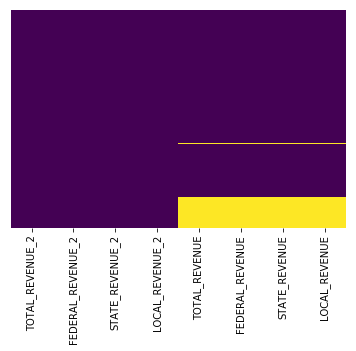

In [331]:
#Once columns above are clean, we have to create the column TOTAL_REVENUE_2
education['TOTAL_REVENUE_2'] = education['FEDERAL_REVENUE_2'] + education['STATE_REVENUE_2'] + education['LOCAL_REVENUE_2']


x=education[['TOTAL_REVENUE_2','FEDERAL_REVENUE_2','STATE_REVENUE_2','LOCAL_REVENUE_2','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE']]
print('All null values are in yellow')
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE, OTHER_EXPENDITURE columns**

I suspect there is a similar case with previous columns since TOTAL_EXPENDITURE is the result/sum of  INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE and  OTHER_EXPENDITURE columns. Let's verify if that's true.

In [332]:
education['sum_TOTAL_EXPENDITURE'] = education[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','OTHER_EXPENDITURE']].sum(axis=1)
education[['sum_TOTAL_EXPENDITURE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','OTHER_EXPENDITURE']].iloc[0:10]

,sum_TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,OTHER_EXPENDITURE
0,2390792.0,2653798.0,1481703.0,735036.0,174053.0,NaN
1,886715.0,972488.0,498362.0,350902.0,37451.0,NaN
2,3052754.0,3401580.0,1435908.0,1007732.0,609114.0,NaN
3,1593023.0,1743022.0,964323.0,483488.0,145212.0,NaN
4,24924536.0,27138832.0,14358922.0,8520926.0,2044688.0,NaN
5,3043196.0,3264826.0,1642466.0,1035970.0,364760.0,NaN
6,3339183.0,3721338.0,2148041.0,1142600.0,48542.0,NaN
7,598232.0,638784.0,372722.0,194915.0,30595.0,NaN
8,693111.0,742893.0,329160.0,316679.0,47272.0,NaN
9,10244640.0,11305642.0,5166374.0,3410440.0,1667826.0,NaN


There is a difference between sum_TOTAL_EXPENDITURE (sum of 4 variables) and TOTAL_EXPENDITURE, so the aproach to clean those variables will be imputation. 

In [333]:
#Cleaning with imputation with mean()

general_imputation(['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','OTHER_EXPENDITURE'])


#Verifying if there is null values
print(education.TOTAL_EXPENDITURE_2.isnull().value_counts())
print(education.INSTRUCTION_EXPENDITURE_2.isnull().value_counts())
print(education.SUPPORT_SERVICES_EXPENDITURE_2.isnull().value_counts())
print(education.CAPITAL_OUTLAY_EXPENDITURE_2.isnull().value_counts())
print(education.OTHER_EXPENDITURE_2.isnull().value_counts())


False    1492
Name: TOTAL_EXPENDITURE_2, dtype: int64
False    1492
Name: INSTRUCTION_EXPENDITURE_2, dtype: int64
False    1492
Name: SUPPORT_SERVICES_EXPENDITURE_2, dtype: int64
False    1492
Name: CAPITAL_OUTLAY_EXPENDITURE_2, dtype: int64
False    1492
Name: OTHER_EXPENDITURE_2, dtype: int64


All null values are in yellow


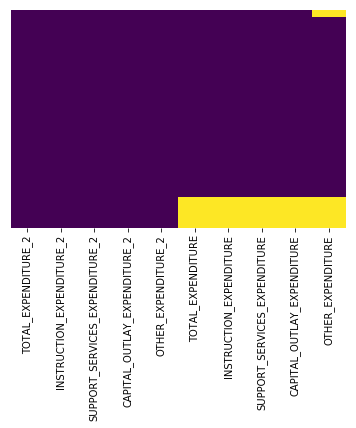

In [334]:
x= education[['TOTAL_EXPENDITURE_2','INSTRUCTION_EXPENDITURE_2','SUPPORT_SERVICES_EXPENDITURE_2','CAPITAL_OUTLAY_EXPENDITURE_2','OTHER_EXPENDITURE_2','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','OTHER_EXPENDITURE']]
print('All null values are in yellow')
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

_TOTAL-EXPENDITURE, INSTRUCTION-EXPENDITURE, SUPPORT-SERVICES-EXPENDITURE, CAPITAL-OUTLAY-EXPENDITURE, OTHER-EXPENDITURE columns are cleaning now_

**GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE and AVG_READING_8_SCORE columns will be clean with imputation technique**

All null values are in yellow


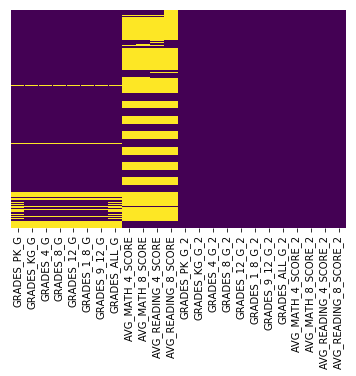

In [335]:
general_imputation(['GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

x = education[['GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','GRADES_PK_G_2','GRADES_KG_G_2','GRADES_4_G_2','GRADES_8_G_2','GRADES_12_G_2','GRADES_1_8_G_2','GRADES_9_12_G_2','GRADES_ALL_G_2','AVG_MATH_4_SCORE_2','AVG_MATH_8_SCORE_2','AVG_READING_4_SCORE_2','AVG_READING_8_SCORE_2']]
print('All null values are in yellow')
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.


In [336]:
#Verifying there is data for all years for all columns
education[['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','YEAR']].groupby('YEAR').mean()

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,NaN,4.050078e+05,9392.888889,...,60724.875000,56872.357143,44038.767857,485748.410714,207994.392857,726734.666667,218.410116,266.360319,212.712256,263.307067
1993,4.768758e+06,3.086224e+05,2.209300e+06,2.250836e+06,4.788283e+06,2.540431e+06,1.419870e+06,248234.784314,4.096238e+05,10147.888889,...,61044.321429,59019.875000,43930.089286,491633.553571,212404.464286,738159.000000,NaN,NaN,NaN,NaN
1994,4.916678e+06,3.272233e+05,2.225664e+06,2.363790e+06,4.954213e+06,2.626080e+06,1.476894e+06,262916.705882,4.041495e+05,11207.833333,...,62184.750000,59953.285714,45072.160714,496646.464286,216987.839286,749170.222222,NaN,NaN,NaN,NaN
1995,5.476034e+06,3.546117e+05,2.555041e+06,2.566381e+06,5.526114e+06,2.931096e+06,1.616281e+06,295324.647059,4.765508e+05,11853.351852,...,62258.821429,60907.035714,45061.214286,502088.482143,222061.821429,760743.777778,NaN,NaN,NaN,NaN
1996,5.744172e+06,3.647964e+05,2.737296e+06,2.642080e+06,5.838049e+06,3.076873e+06,1.680742e+06,303516.137255,5.445423e+05,12267.854545,...,61709.245614,60714.894737,46054.245614,502958.631579,225201.280702,764874.909091,221.479509,270.182528,214.587049,261.412097
1997,6.115397e+06,3.869910e+05,2.940125e+06,2.788281e+06,6.193357e+06,3.245567e+06,1.762159e+06,305274.705882,6.359637e+05,12721.145455,...,62649.982456,60906.000000,47575.403509,507648.192982,228669.684211,773816.636364,NaN,NaN,NaN,NaN
1998,6.504525e+06,4.272517e+05,3.140750e+06,2.936523e+06,6.595780e+06,3.427786e+06,1.873964e+06,318956.098039,7.034032e+05,13093.642857,...,63126.655172,61054.206897,47627.310345,504449.672414,227326.982759,769850.535714,NaN,NaN,NaN,NaN
1999,6.954543e+06,4.747857e+05,3.390289e+06,3.089468e+06,7.068126e+06,3.633184e+06,1.999630e+06,334733.431373,7.937301e+05,13560.625000,...,64770.827586,61356.137931,48705.620690,508090.155172,230605.482759,777501.660714,NaN,NaN,NaN,NaN
2000,7.443181e+06,5.229861e+05,3.650809e+06,3.269385e+06,7.572106e+06,3.883017e+06,2.136325e+06,352342.941176,8.755735e+05,14016.500000,...,64045.983051,61031.152542,48223.338983,504013.627119,229663.101695,784420.321429,224.803526,273.028605,217.612609,262.687292


**Based on table above, there is no information for some years, in those cases I'll fill those columns with all-years mean()**


In [337]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = education['YEAR'].unique()
    
    for column_name in columns:

        new_column = column_name + '_3'
        education[new_column] = education[column_name]
        
        for year in years:
            
            m=education[education['YEAR']==year][[new_column,'YEAR']].mean()
            mean = m.astype('float')
            
            group = (education['YEAR']==year)
    
            if math.isnan(mean[0]):            
                mean_r = education[new_column].mean()

            else:
                mean_r = education[education['YEAR']==year][new_column].mean()
                
            education.loc[group,new_column] = education.loc[group,new_column].fillna(mean_r)

                
    return 'Done'

In [341]:
#Cleaning columns with mean per year
general_imputation_year(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE',
                         'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE',
                         'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G',
                         'GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE',
                         'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])


'Done'

All null values are in yellow


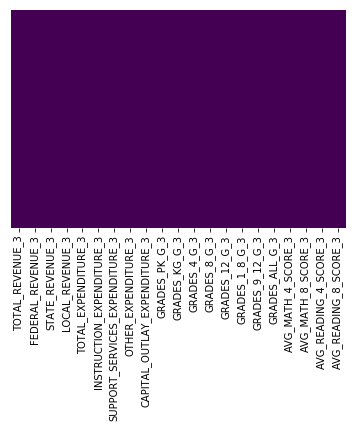

In [342]:
x = education[['TOTAL_REVENUE_3','FEDERAL_REVENUE_3','STATE_REVENUE_3','LOCAL_REVENUE_3','TOTAL_EXPENDITURE_3','INSTRUCTION_EXPENDITURE_3','SUPPORT_SERVICES_EXPENDITURE_3','OTHER_EXPENDITURE_3','CAPITAL_OUTLAY_EXPENDITURE_3','GRADES_PK_G_3','GRADES_KG_G_3','GRADES_4_G_3','GRADES_8_G_3','GRADES_12_G_3','GRADES_1_8_G_3','GRADES_9_12_G_3','GRADES_ALL_G_3','AVG_MATH_4_SCORE_3','AVG_MATH_8_SCORE_3','AVG_READING_4_SCORE_3','AVG_READING_8_SCORE_3']]
print('All null values are in yellow')
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

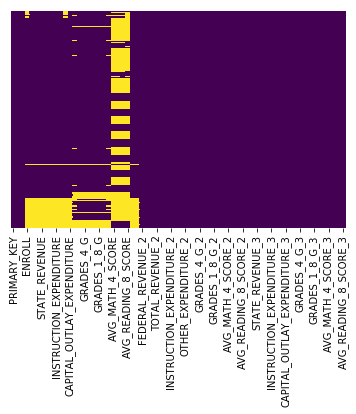

In [343]:

sns.heatmap(education.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 4. This time, fill in the missing values using interpolation (extrapolation).


In [344]:
def interpolation(columns):

    """ Function: Apply interpolation 
        Parameters: a list of columns to clean
        Return: string
    """     
        
    for column in columns:
        
        new_column = column + '_4'
        education[new_column] = education[column]
        
        education[new_column]=education[new_column].interpolate(method='linear', limit_direction='forward', axis=0)

    return 'Done'    

In [346]:
#Cleaning columns with interpolation per year
interpolation(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])


'Done'

All null values are in yellow


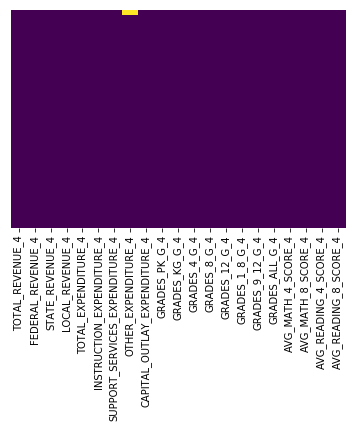

In [348]:
x = education[['TOTAL_REVENUE_4','FEDERAL_REVENUE_4','STATE_REVENUE_4','LOCAL_REVENUE_4','TOTAL_EXPENDITURE_4','INSTRUCTION_EXPENDITURE_4','SUPPORT_SERVICES_EXPENDITURE_4','OTHER_EXPENDITURE_4','CAPITAL_OUTLAY_EXPENDITURE_4','GRADES_PK_G_4','GRADES_KG_G_4','GRADES_4_G_4','GRADES_8_G_4','GRADES_12_G_4','GRADES_1_8_G_4','GRADES_9_12_G_4','GRADES_ALL_G_4','AVG_MATH_4_SCORE_4','AVG_MATH_8_SCORE_4','AVG_READING_4_SCORE_4','AVG_READING_8_SCORE_4']]
print('All null values are in yellow')
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')


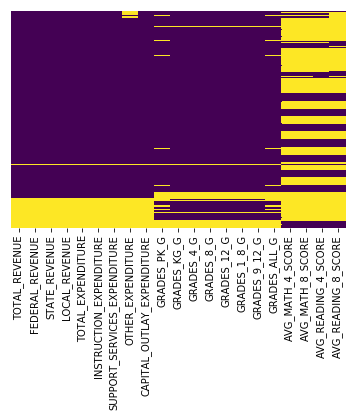

In [350]:
x = education[['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

No really, all null values were filled and the dataset was cleaned, except some null values where I used interpolation to fill them.

-------------------------------------------------
**By Wendy Navarrete / Jun 25th, 2019**